In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
sns.set_style('whitegrid')

In [61]:
%matplotlib inline

# Read fiels

In [62]:
data=pd.read_csv('train.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [63]:
test=pd.read_csv('test.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


# Prepare for battle

In [64]:
train_df=data.drop(['Name', 'PassengerId', 'Ticket'], axis=1)
test_df=test.drop(['Name', 'Ticket'], axis=1)

In [65]:
train_df['Embarked']=train_df['Embarked'].fillna("S")


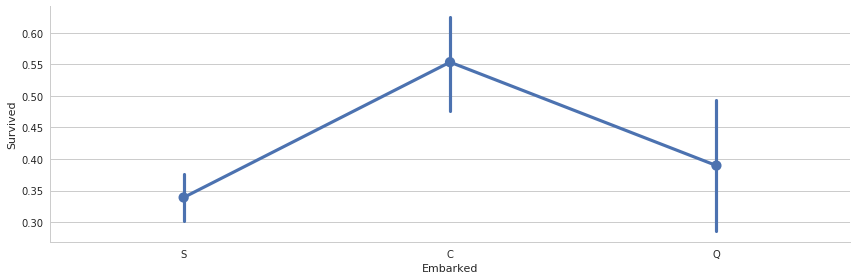

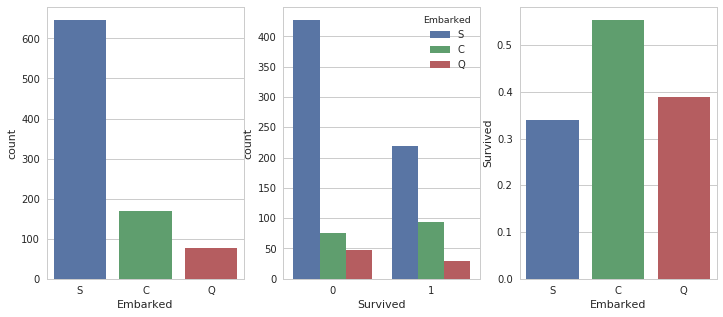

In [66]:
# resurch correlation with 'Embarked' and 'Survived'

sns.factorplot('Embarked', 'Survived', data=train_df, size=4, aspect=3)
__, (axes1,axes2,axes3)=plt.subplots(1,3, figsize=(12,5))
sns.countplot('Embarked', data=train_df,ax=axes1)
sns.countplot('Survived', hue='Embarked', data=train_df, ax=axes2)

embark=train_df[['Embarked', 'Survived']].groupby('Embarked', as_index=False).mean()
sns.barplot(x='Embarked', y='Survived', data=embark, order=['S','C', 'Q'], ax=axes3)

In [67]:
#delete "S" digits and do a hot one score

embark_train_titanic=pd.get_dummies(train_df['Embarked'])
embark_train_titanic.drop(['S'], axis=1, inplace=True)

embark_test_titanic=pd.get_dummies(test_df['Embarked'])
embark_test_titanic.drop(['S'], axis=1, inplace=True)

#add new digits
train_df=train_df.join(embark_train_titanic)
test_df=test_df.join(embark_test_titanic)

train_df.drop(['Embarked'], axis=1, inplace=True)
test_df.drop(['Embarked'], axis=1, inplace=True)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,C,Q
0,0,3,male,22.0,1,0,7.2500,NaN,0,0
1,1,1,female,38.0,1,0,71.2833,C85,1,0
2,1,3,female,26.0,0,0,7.9250,NaN,0,0
3,1,1,female,35.0,1,0,53.1000,C123,0,0
4,0,3,male,35.0,0,0,8.0500,NaN,0,0


In [68]:
# reseach Fare
from pandas import Series,DataFrame
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)

train_df['Fare']=train_df['Fare'].astype(int)
test_df['Fare']=test_df['Fare'].astype(int)

not_survived=train_df['Fare'][train_df['Survived']==0]
survived=train_df['Fare'][train_df['Survived']==1]

#find means ans std for survived and not_survived

avveradge=DataFrame([survived.mean(), not_survived.mean()])

std=DataFrame([survived.std(), not_survived.std()])



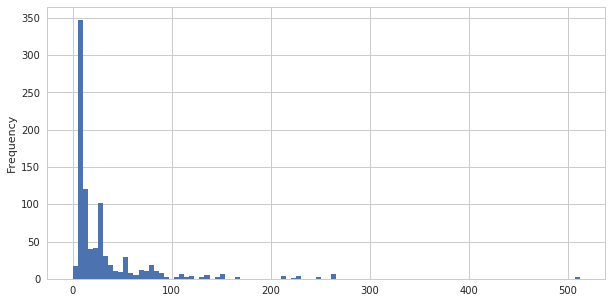

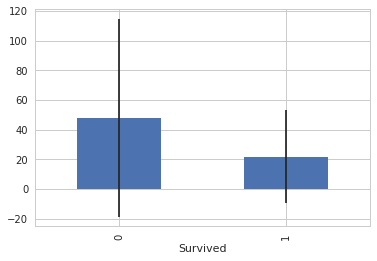

In [69]:
train_df['Fare'].plot(kind='hist',bins=100, figsize=(10,5))

avveradge.index.names=std.index.names=["Survived"]
avveradge.plot(yerr=std, kind='bar', legend=False)

/home/yakudza/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/yakudza/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


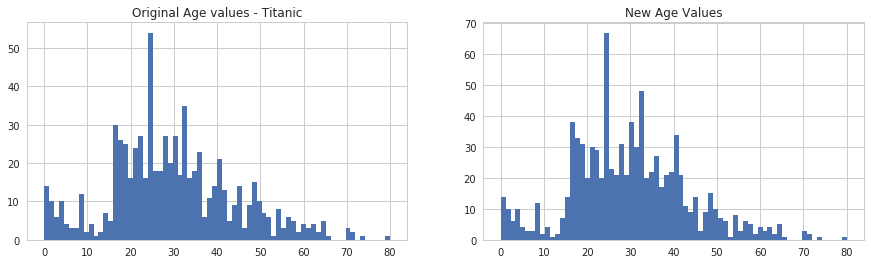

In [70]:
#Reseach age

__, (axis1, axis2)=plt.subplots(1,2, figsize=(15,4))
axis1.set_title("Original Age values - Titanic")
axis2.set_title("New Age Values")

mean_age_titanic=train_df['Age'].mean()
std_age_titanic=train_df['Age'].std()

null_age_titanic=train_df['Age'].isnull().sum()


mean_age_test=test_df['Age'].mean()
std_age_test=test_df['Age'].std()

null_age_test=test_df['Age'].isnull().sum()

# create unreal digits

rand_1=np.random.randint(mean_age_titanic-std_age_titanic, mean_age_titanic+std_age_titanic, 
                        size=null_age_titanic)
rand_2=np.random.randint(mean_age_test-std_age_test, mean_age_test+std_age_test, 
                        size=null_age_test)

#find differenc throw old age and new age

train_df['Age'].dropna().astype(int).hist(bins=70, ax=axis1)

train_df['Age'][np.isnan(train_df['Age'])]=rand_1
test_df['Age'][np.isnan(test_df['Age'])]=rand_2

train_df['Age']=train_df['Age'].astype(int)
test_df['Age']=test_df['Age'].astype(int)

train_df['Age'].hist(bins=70, ax=axis2)


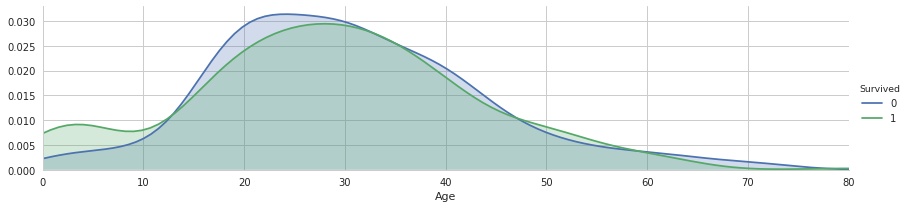

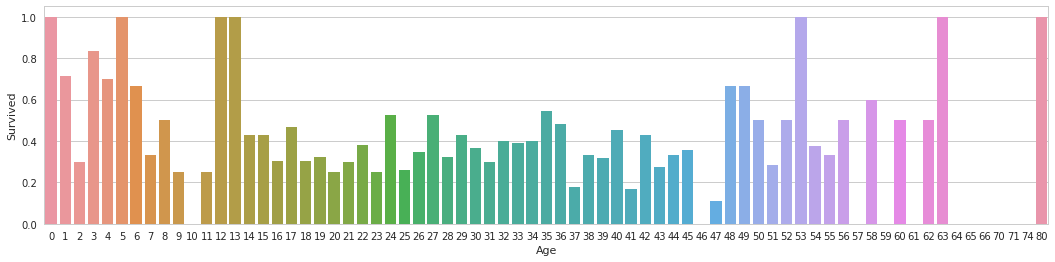

In [71]:
# peaks for survived/not survived passengers by their age
faced=sns.FacetGrid(train_df, hue='Survived', aspect=4)
faced.map(sns.kdeplot, 'Age', shade=True)
faced.set(xlim=(0, train_df['Age'].max()))
faced.add_legend()

__, axes=plt.subplots(1,1 , figsize=(18,4))

avarage_age=train_df[['Age','Survived']].groupby(['Age'], as_index=False).mean()

sns.barplot(x='Age', y='Survived',data=avarage_age)

In [72]:
#cabin delete

train_df.drop("Cabin", inplace=True, axis=1)
test_df.drop("Cabin", inplace=True,  axis=1)



In [73]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q
0,0,3,male,22,1,0,7,0,0
1,1,1,female,38,1,0,71,1,0
2,1,3,female,26,0,0,7,0,0
3,1,1,female,35,1,0,53,0,0
4,0,3,male,35,0,0,8,0,0


In [74]:
#family
#create new column Family

train_df['Family']=train_df['Parch']+train_df['SibSp']
train_df['Family'].loc[train_df['Family']>0]=1
train_df['Family'].loc[train_df['Family']==0]=0


test_df['Family']=test_df['Parch']+test_df['SibSp']
test_df['Family'].loc[test_df['Family']>0]=1
test_df['Family'].loc[test_df['Family']==0]=0

#drop parch and sibsp

train_df=train_df.drop(['Parch', 'SibSp'], axis=1)
test_df=test_df.drop(['Parch', 'SibSp'], axis=1)




/home/yakudza/.local/lib/python2.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


[Text(0,0,'With Family'), Text(0,0,'Alone')]

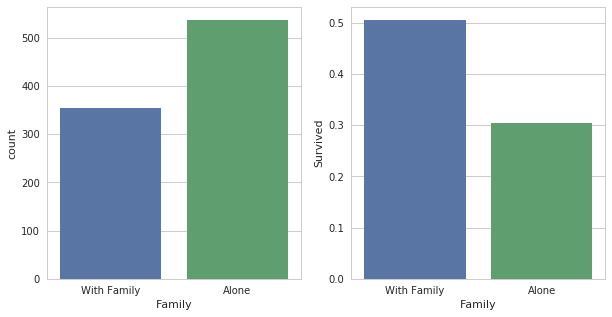

In [76]:
__, (axes1, axes2)=plt.subplots(1,2, figsize=(10,5), sharex=True)

sns.countplot('Family', data=train_df, order=[1,0], ax=axes1)



family_perc = train_df[["Family", 'Survived']].groupby(['Family'],as_index=False).mean()
sns.barplot(x='Family', y='Survived', data=family_perc, order=[1,0], ax=axes2)

axes1.set_xticklabels(["With Family","Alone"], rotation=0)

In [80]:
#Sex

def get_person(passenger):
    age, sex = passenger
    return 'child' if age<16 else sex

train_df['Person']=train_df[['Age', 'Sex']].apply(get_person, axis=1)
test_df['Person']=test_df[['Age', 'Sex']].apply(get_person, axis=1)





KeyError: "['sex'] not found in axis"

In [110]:
train_df.drop(["Sex"],axis=1, inplace=True)
test_df.drop(["Sex"],axis=1, inplace=True)


In [90]:
#delete maile
person_dummi_train=pd.get_dummies(train_df['Person'])
person_dummi_train.columns=['child', 'Female', 'Maile']
person_dummi_train.drop(['Maile'], axis=1, inplace=True)

person_dummi_test=pd.get_dummies(test_df['Person'])
person_dummi_test.columns=['child', 'Female', 'Maile']
person_dummi_test.drop(['Maile'], axis=1, inplace=True)

train_df=train_df.join(person_dummi_train)
test_df=test_df.join(person_dummi_test)



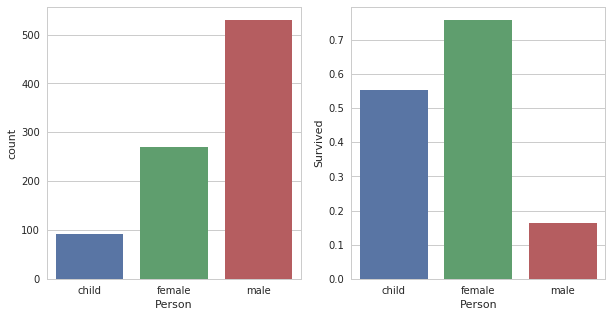

In [92]:
__, (axes1, axes2)=plt.subplots(1,2, figsize=(10,5), sharex=True)

sns.countplot('Person', data=train_df, order=['child', 'female', 'male'], ax=axes1)



person_perc = train_df[["Person", 'Survived']].groupby(['Person'],as_index=False).mean()
sns.barplot(x='Person', y='Survived', data=person_perc, order=['child', 'female', 'male'], ax=axes2)

train_df.drop(["Person"], axis=1, inplace=True)
test_df.drop(["Person"], axis=1, inplace=True)

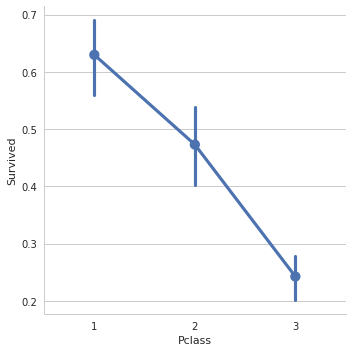

In [96]:
#Pclass

sns.factorplot('Pclass', 'Survived', order=[1,2,3],data=train_df, size=5)

pclass_dummi_train=pd.get_dummies(train_df['Pclass'])
pclass_dummi_train.columns=['Pclass1', 'Pclass2', 'Pclass3']
pclass_dummi_train.drop('Pclass3', axis=1, inplace=True)

pclass_dummi_test=pd.get_dummies(test_df['Pclass'])
pclass_dummi_test.columns=['Pclass1', 'Pclass2', 'Pclass3']
pclass_dummi_test.drop('Pclass3', axis=1, inplace=True)

train_df=train_df.join(pclass_dummi_train)
test_df=test_df.join(pclass_dummi_test)

train_df.drop('Pclass', axis=1, inplace=True)
test_df.drop('Pclass', axis=1, inplace=True)

# Mashine leaning



In [112]:
X_train=train_df.drop('Survived',axis=1)
Y_train=train_df['Survived']
X_test=test_df.drop('PassengerId', axis=1).copy()

In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

/home/yakudza/anaconda2/lib/python2.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [113]:
#LogisticRegression

Loger=LogisticRegression()
Loger.fit(X_train,Y_train)
Y_pred=Loger.predict(X_test)
Loger.score(X_train,Y_train)

0.8058361391694725

In [115]:
#SVM
svc=SVC()
svc.fit(X_train, Y_train)
svc.score(X_train, Y_train)
Y_pred=svc.predict(X_test)

0.8585858585858586

In [116]:
#Random forest

tree=RandomForestClassifier()
tree.fit(X_train, Y_train)
tree.score(X_train, Y_train)
Y_pred=tree.predict(X_test)

0.9584736251402918

In [117]:
Kneibors=KNeighborsClassifier()
Kneibors.fit(X_train, Y_train)
Kneibors.score(X_train, Y_train)

0.7845117845117845

In [118]:
beayse=GaussianNB()
beayse.fit(X_train, Y_train)
beayse.score(X_train, Y_train)

0.7598204264870931